### Import libraries and create data frame

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare Data

In [128]:
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [129]:
'''
# Standardize Data Formats
# Convert categorical columns to 'category' type
stroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')
stroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')
stroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')
stroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')
stroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')
'''

"\n# Standardize Data Formats\n# Convert categorical columns to 'category' type\nstroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')\nstroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')\nstroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')\nstroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')\nstroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')\n"

In [130]:
# Ensure Consistency
# Convert 'id' to string 
stroke_df['id'] = stroke_df['id'].astype(str)

In [131]:
# Display the cleaned DataFrame and its data types
display(stroke_df.head())
print(stroke_df.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                    object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [132]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [ ]:
# only 3% of the data is missing bmi data so we drop it
stroke_df = stroke_df.dropna()

# only one row with gender other so we drop it
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

### Split into X and y

In [134]:
X = stroke_df.drop(columns=['id', 'stroke'])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [135]:
y = stroke_df['stroke']

### Train test split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [137]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [138]:
(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.22432762836185818

In [139]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [140]:
X_train.loc[X_train['smoking_status'] == 'Unknown'].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,29.758946,0.024523,0.028156,98.191499,25.713715
std,24.718526,0.154737,0.165494,35.406038,7.952527
min,0.080000,0.000000,0.000000,55.230000,11.300000
25%,8.000000,0.000000,0.000000,76.110000,19.500000
50%,23.000000,0.000000,0.000000,89.280000,24.600000
75%,50.000000,0.000000,0.000000,109.560000,30.200000
max,82.000000,1.000000,1.000000,254.600000,61.200000


In [141]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000
mean,43.019723,0.089378,0.052703,104.820277,29.023200
std,22.433095,0.285327,0.223470,44.210654,7.814099
min,0.080000,0.000000,0.000000,55.120000,11.300000
25%,25.000000,0.000000,0.000000,76.560000,23.800000
50%,45.000000,0.000000,0.000000,91.540000,28.200000
75%,60.000000,0.000000,0.000000,112.770000,33.300000
max,82.000000,1.000000,1.000000,271.740000,92.000000


<Axes: ylabel='Frequency'>

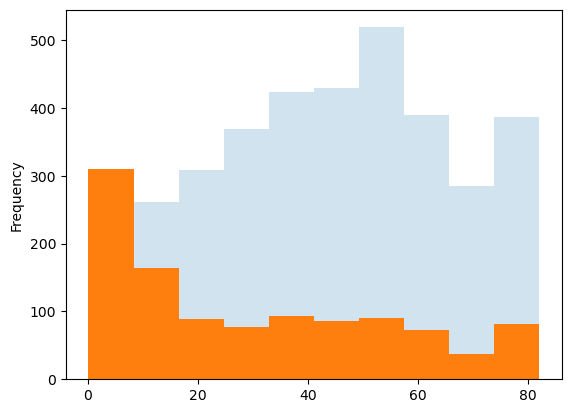

In [142]:
X_train['age'].plot(kind='hist',alpha=0.2)
X_train.loc[stroke_df['smoking_status'] == 'Unknown', 'age'].plot(kind='hist')

In [143]:
# We will assume most of the unknown values below the legal smoking age fall into the never smoked category
for index, row in X_train.iterrows():
    if row['age'] <= 18:
        X_train.at[index, 'smoking_status'] = 'never smoked'

(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.12082314588427058

In [144]:
'''
for x in stroke_df:
    display(stroke_df[x].value_counts())
'''

'\nfor x in stroke_df:\n    display(stroke_df[x].value_counts())\n'

### Scale The Data

In [145]:
scaler = StandardScaler()
col_scale = ['age', 'bmi', 'avg_glucose_level']
#Fit the scaler to the columnsint he training set
X_train[col_scale]=scaler.fit_transform(X_train[col_scale])
#Transform
X_test[col_scale]=scaler.fit_transform(X_test[col_scale])


In [146]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
271,Female,0.266619,0,0,Yes,Private,Rural,-1.008950,0.317009,smokes
2604,Male,0.757033,0,0,Yes,Private,Rural,-0.383676,-0.002969,formerly smoked
4894,Female,-0.402127,0,0,No,Govt_job,Urban,-0.570535,2.211278,never smoked
1372,Male,-0.090045,0,0,Yes,Private,Rural,-0.068551,-0.297349,Unknown
3894,Female,-1.892984,0,0,No,children,Urban,-0.540673,-1.372475,never smoked


## Encode the dataset

In [147]:
#encode# List 
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type']

#One-Hot Encoding with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

#Check the data
X_train_encoded.head()
#X_train_encoded.isna().sum()/len(stroke_df)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
271,0.266619,0,0,-1.008950,0.317009,smokes,False,True,False,True,False,False,False
2604,0.757033,0,0,-0.383676,-0.002969,formerly smoked,True,True,False,True,False,False,False
4894,-0.402127,0,0,-0.570535,2.211278,never smoked,False,False,False,False,False,False,True
1372,-0.090045,0,0,-0.068551,-0.297349,Unknown,True,True,False,True,False,False,False
3894,-1.892984,0,0,-0.540673,-1.372475,never smoked,False,False,False,False,False,True,True


In [148]:
# Create an encoder for the backpack_color column
smoke_ord_enc = OrdinalEncoder(categories = [['smokes','formerly smoked','never smoked']],encoded_missing_value = -1,
                               handle_unknown = 'use_encoded_value', unknown_value = -1) 
#PUT CATEGORIES IN ORDER LOWEST TO HIGHEST ORDER

# Train the encoder
smoke_ord_enc.fit(X_train['smoking_status'].values.reshape(-1,1))

OrdinalEncoder(categories=[['smokes', 'formerly smoked', 'never smoked']],
               encoded_missing_value=-1, handle_unknown='use_encoded_value',
               unknown_value=-1)

In [149]:
X_train_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_train_encoded['smoking_status'].values.reshape(-1,1))
X_test_encoded['smoking_status_ordinal'] = smoke_ord_enc.fit_transform(X_test_encoded['smoking_status'].values.reshape(-1,1))

In [150]:
X_test_encoded.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
1305,0.069121,0,0,-0.427209,-0.239740,never smoked,True,True,False,False,False,False,False,2.0
4083,0.112760,0,0,-0.310186,-0.779855,Unknown,False,True,False,False,True,False,True,-1.0
1495,-0.061796,0,0,-0.052600,0.212449,never smoked,False,True,False,True,False,False,False,2.0
509,-0.149074,0,0,-0.487165,0.903293,never smoked,False,True,False,True,False,False,False,2.0
4722,1.552852,1,0,1.013715,0.413422,never smoked,False,True,False,False,True,False,False,2.0
4407,-0.367270,0,0,-0.796267,3.415455,formerly smoked,False,False,False,True,False,False,True,1.0
2107,0.418234,1,0,1.409863,-0.164376,formerly smoked,False,False,False,True,False,False,False,1.0
2228,0.243678,1,0,1.738063,-0.302545,never smoked,True,True,False,True,False,False,True,2.0
998,-0.585466,0,0,-0.734091,-0.943146,Unknown,False,False,False,True,False,False,True,-1.0
1877,-1.720084,0,0,-0.640828,-1.282288,Unknown,False,False,False,False,False,True,False,-1.0


In [151]:
X_train_encoded = X_train_encoded.drop(['smoking_status'], axis=1)
X_test_encoded = X_test_encoded.drop(['smoking_status'], axis=1)

In [152]:
X_test_encoded.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
1305,0.069121,0,0,-0.427209,-0.239740,True,True,False,False,False,False,False,2.0
4083,0.112760,0,0,-0.310186,-0.779855,False,True,False,False,True,False,True,-1.0
1495,-0.061796,0,0,-0.052600,0.212449,False,True,False,True,False,False,False,2.0
509,-0.149074,0,0,-0.487165,0.903293,False,True,False,True,False,False,False,2.0
4722,1.552852,1,0,1.013715,0.413422,False,True,False,False,True,False,False,2.0
4407,-0.367270,0,0,-0.796267,3.415455,False,False,False,True,False,False,True,1.0
2107,0.418234,1,0,1.409863,-0.164376,False,False,False,True,False,False,False,1.0
2228,0.243678,1,0,1.738063,-0.302545,True,True,False,True,False,False,True,2.0
998,-0.585466,0,0,-0.734091,-0.943146,False,False,False,True,False,False,True,-1.0
1877,-1.720084,0,0,-0.640828,-1.282288,False,False,False,False,False,True,False,-1.0


## Random Oversampling

In [153]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_encoded, y_train)


In [154]:
# Count distinct resampled values
y_resampled.value_counts()

stroke
0    3530
1    3530
Name: count, dtype: int64

In [155]:
# 
X_train_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_ordinal
271,0.266619,0,0,-1.008950,0.317009,False,True,False,True,False,False,False,0.0
2604,0.757033,0,0,-0.383676,-0.002969,True,True,False,True,False,False,False,1.0
4894,-0.402127,0,0,-0.570535,2.211278,False,False,False,False,False,False,True,2.0
1372,-0.090045,0,0,-0.068551,-0.297349,True,True,False,True,False,False,False,-1.0
3894,-1.892984,0,0,-0.540673,-1.372475,False,False,False,False,False,True,True,2.0


In [156]:
# Instantiate an initial RamdonForestClassifier instance
model = RandomForestClassifier(random_state = 42)

# Fit the initial model based the training data
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [157]:
# Make predictions for testing features
y_pred = model.predict(X_test_encoded)

In [158]:
# Print the classification reports for the two models
print(classification_report(y_test, y_pred))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred),3)}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.20      0.02      0.03        58

    accuracy                           0.95      1227
   macro avg       0.58      0.51      0.50      1227
weighted avg       0.92      0.95      0.93      1227

balanced accuracy score: 0.507


# SMOTE

In [159]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [160]:
y_train_resampled.value_counts()

stroke
0    3530
1    3530
Name: count, dtype: int64

### Random Forest

In [161]:
# Instantiate an initial RamdonForestClassifier instance
rfc_model = RandomForestClassifier(random_state = 42)

# Fit the initial model based the training data
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [162]:
y_pred_rfc = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred_rfc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_rfc),3)}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1169
           1       0.20      0.02      0.03        58

    accuracy                           0.95      1227
   macro avg       0.58      0.51      0.50      1227
weighted avg       0.92      0.95      0.93      1227

balanced accuracy score: 0.507


### Decision Tree

In [163]:
# Instantiate an initial decision tree instance
dt_model = DecisionTreeClassifier(random_state = 42)

# Fit the initial model based the training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict y data
y_pred_dt = dt_model.predict(X_test_encoded)

In [164]:
print(classification_report(y_test, y_pred_dt))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_dt),3)}")

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1169
           1       0.09      0.28      0.14        58

    accuracy                           0.84      1227
   macro avg       0.53      0.57      0.52      1227
weighted avg       0.92      0.84      0.87      1227

balanced accuracy score: 0.57


### Logistic Regression

In [165]:
# Instantiate an initial logistic regression instance
lr_model = LogisticRegression(random_state = 42)

# Fit the initial model based the training data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict y data
y_pred_lr = lr_model.predict(X_test_encoded)

In [166]:
print(classification_report(y_test, y_pred_lr))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_lr),3)}")

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1169
           1       0.12      0.71      0.20        58

    accuracy                           0.74      1227
   macro avg       0.55      0.72      0.52      1227
weighted avg       0.94      0.74      0.81      1227

balanced accuracy score: 0.723


### SVC

In [167]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_resampled, y_train_resampled)
y_pred_svc = svc_model.predict(X_test_encoded)

In [168]:
print(classification_report(y_test, y_pred_svc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_svc),3)}")

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1169
           1       0.11      0.57      0.19        58

    accuracy                           0.77      1227
   macro avg       0.54      0.68      0.53      1227
weighted avg       0.93      0.77      0.84      1227

balanced accuracy score: 0.675


### AdaBoost

In [169]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada_model.predict(X_test_encoded)

C:\Users\jclib\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [170]:
print(classification_report(y_test, y_pred_ada))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_ada),3)}")

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1169
           1       0.12      0.72      0.20        58

    accuracy                           0.73      1227
   macro avg       0.55      0.73      0.52      1227
weighted avg       0.94      0.73      0.81      1227

balanced accuracy score: 0.728


## Voting Classifier

In [171]:
voting_clf = VotingClassifier(estimators=[('rfc', rfc_model), ('dt', dt_model), ('lr', lr_model), ('ada',ada_model)], voting='soft')

In [172]:
voting_clf.fit(X_train_resampled, y_train_resampled)

C:\Users\jclib\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42))],
                 voting='soft')

In [173]:
y_pred_voting = voting_clf.predict(X_test_encoded)

In [174]:
print(classification_report(y_test, y_pred_voting))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_voting),3)}")

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1169
           1       0.13      0.33      0.18        58

    accuracy                           0.86      1227
   macro avg       0.55      0.61      0.55      1227
weighted avg       0.92      0.86      0.89      1227

balanced accuracy score: 0.608


In [175]:
# Import libraries and create data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC  # Importing Support Vector Classifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")

# Data Cleaning and Preprocessing
# Standardizing Data Formats
stroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')
stroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')
stroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')
stroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')
stroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')
stroke_df['id'] = stroke_df['id'].astype(str)

# Split the dataset into features (X) and target (y)
X = stroke_df.drop(columns=['id', 'stroke'])
y = stroke_df['stroke']

# Handle missing values (fill bmi column)
X['bmi'] = X['bmi'].fillna(stroke_df['bmi'].mean())

# Replace 'Unknown' values in smoking_status based on age
for index, row in X.iterrows():
    if row['smoking_status'] == 'Unknown' and row['age'] <= 18:
        X.at[index, 'smoking_status'] = 'never smoked'

# One-Hot Encoding of categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

# Random Oversampling to handle class imbalance
random_oversampler = RandomOverSampler(random_state=1)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

# Alternatively, you could use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the SVC model
svc_model = SVC(random_state=42)

# Fit the model using the resampled data (SMOTE or RandomOversampler)
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svc))
print(f"balanced accuracy score: {round(balanced_accuracy_score(y_test, y_pred_svc), 3)}")

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1203
           1       0.16      0.84      0.27        75

    accuracy                           0.73      1278
   macro avg       0.57      0.78      0.55      1278
weighted avg       0.94      0.73      0.80      1278

balanced accuracy score: 0.78


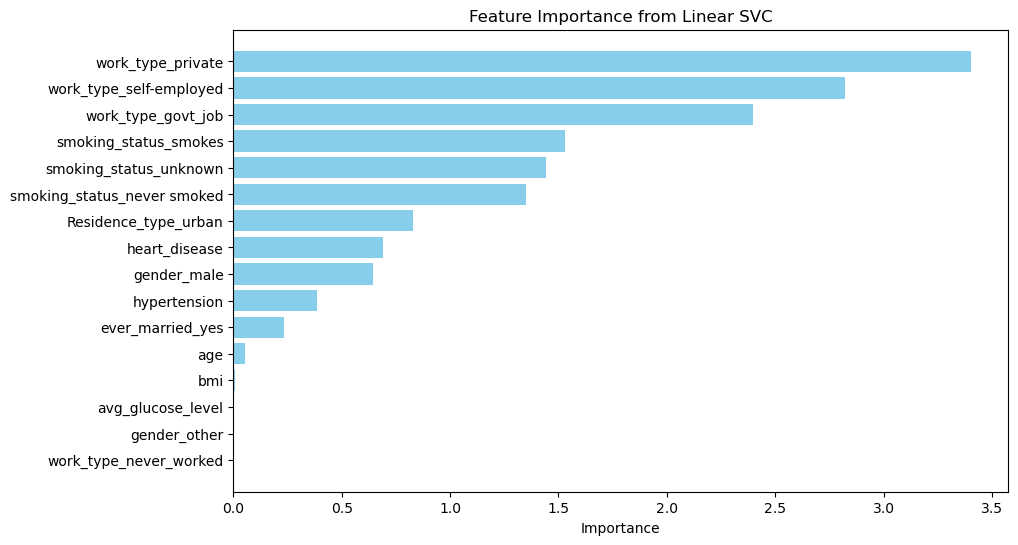

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the SVC model (make sure you use a linear kernel)
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Extract the coefficients (feature importance)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and their corresponding importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Using absolute value of coefficients
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.show()

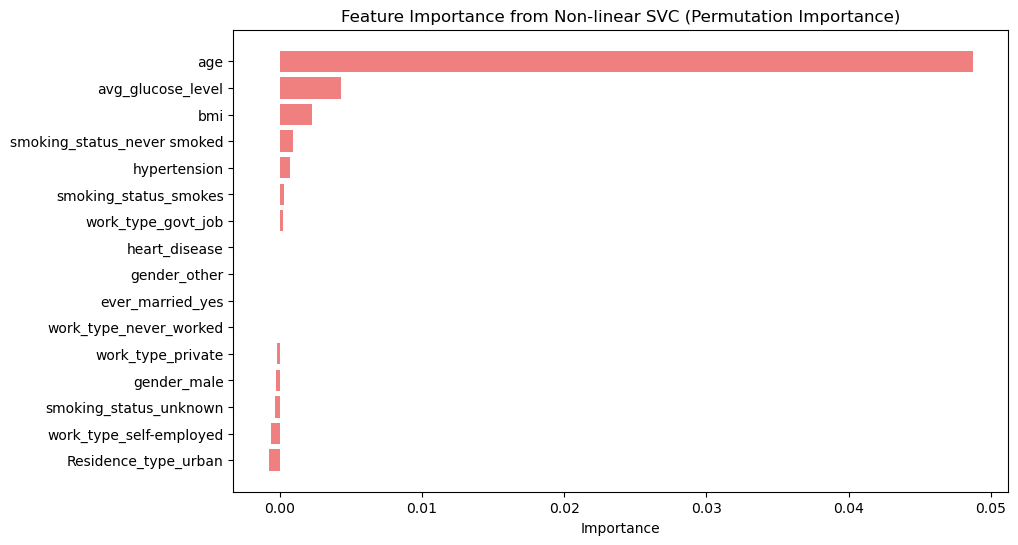

In [177]:
from sklearn.inspection import permutation_importance

# Fit the SVC model (non-linear)
svc_model_non_linear = SVC(kernel='rbf', random_state=42)
svc_model_non_linear.fit(X_train_resampled, y_train_resampled)

# Compute permutation importance
result = permutation_importance(svc_model_non_linear, X_test, y_test, n_repeats=10, random_state=42)

# Get importance scores
importance_scores = result.importances_mean

# Create a DataFrame for the importance
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importance_scores
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance from Non-linear SVC (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for descending order of importance
plt.show()

                        Feature  Importance
10            work_type_private    3.405424
11      work_type_self-employed    2.820119
8            work_type_govt_job    2.396143
14        smoking_status_smokes    1.529094
15       smoking_status_unknown    1.442848
13  smoking_status_never smoked    1.351058
12         Residence_type_urban    0.829684
2                 heart_disease    0.692618
5                   gender_male    0.645352
1                  hypertension    0.386198
7              ever_married_yes    0.234924
0                           age    0.055757
4                           bmi    0.005367
3             avg_glucose_level    0.003319
6                  gender_other    0.000000
9        work_type_never_worked    0.000000


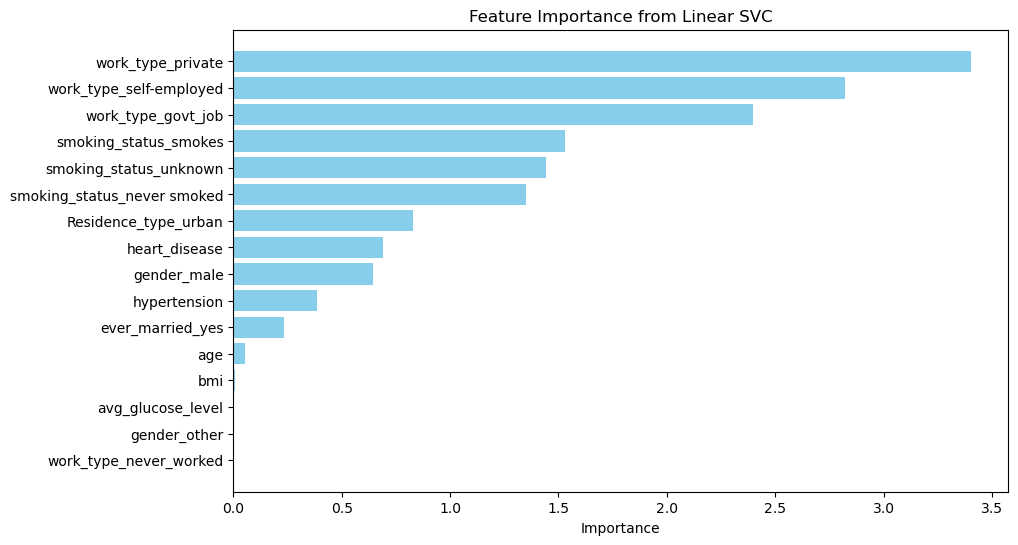

In [178]:
# Assuming that we have trained the SVC model with the following line:
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Get the feature importance (coefficients)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Absolute value of coefficients for importance
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Check if "age" is the most important feature
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

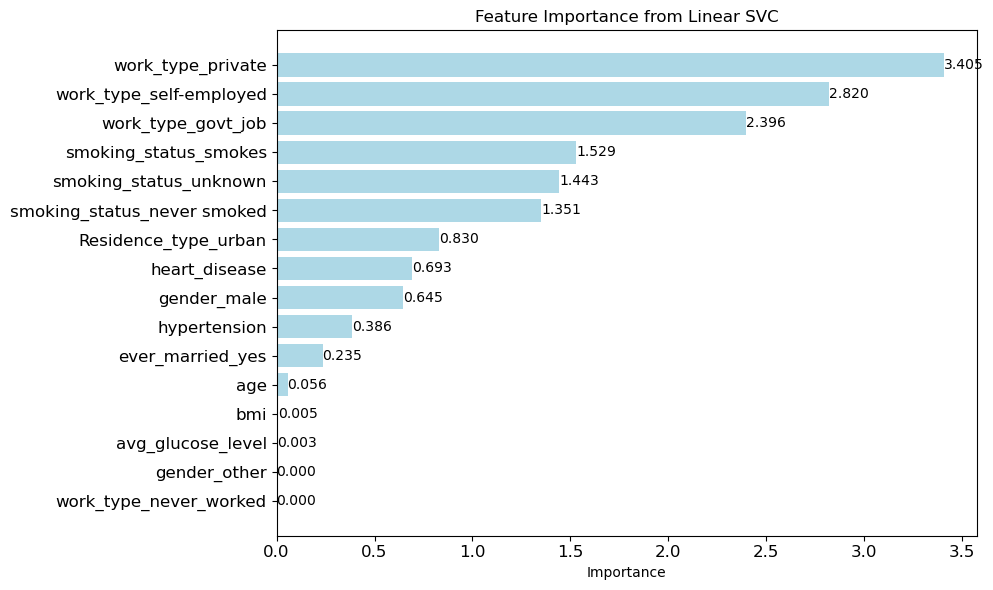

In [179]:
# Assuming that we have trained the SVC model with the following line:
svc_model_linear = SVC(kernel='linear', random_state=42)
svc_model_linear.fit(X_train_resampled, y_train_resampled)

# Get the feature importance (coefficients)
coefficients = svc_model_linear.coef_.flatten()

# Create a DataFrame with feature names and importance
feature_importance = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': np.abs(coefficients)  # Absolute value of coefficients for importance
})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))

# Horizontal bar plot
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightblue')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Importance')
plt.title('Feature Importance from Linear SVC')

# Optionally, add annotations for clarity (show importance scores on bars)
for index, value in enumerate(feature_importance['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left', fontsize=10)

# Remove unnecessary ticks and grids
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

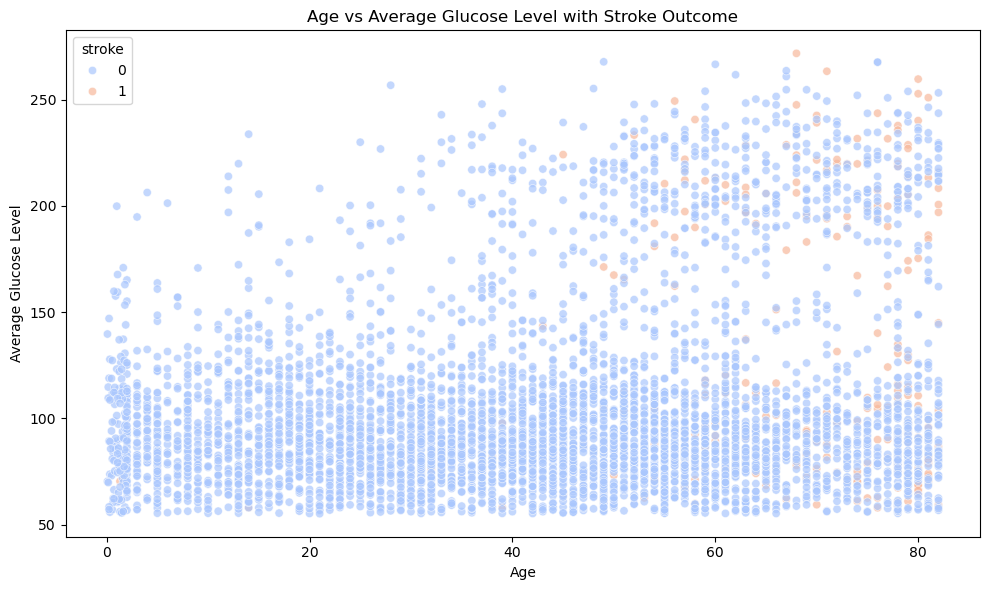

In [180]:


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot showing 'age' vs. 'avg_glucose_level' colored by 'stroke'
plt.figure(figsize=(10, 6))

sns.scatterplot(data=stroke_df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)

# Add labels and title
plt.title('Age vs Average Glucose Level with Stroke Outcome')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

# Show the plot
plt.tight_layout()
plt.show()

In [181]:
# Align train and test sets to have the same columns
X_train_resampled, X_test_encoded = X_train_resampled.align(X_test_encoded, join='inner', axis=1)

# Ensure that columns in both sets are ordered the same way
X_train_resampled = X_train_resampled[X_test_encoded.columns]

# Check for NaN values
print(X_train_resampled.isna().sum())
print(X_test_encoded.isna().sum())

# Optionally fill NaN values (e.g., with mean, median, or mode)
X_train_resampled.fillna(X_train_resampled.mean(), inplace=True)
X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64


In [182]:
# Check the shape of target variables
print(y_train_resampled.shape)
print(y_test.shape)

# Check the first few values to ensure consistency
print(y_train_resampled.head())
print(y_test.head())

(7316,)
(1278,)
0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64
4673    0
3232    0
3694    0
1070    0
4163    0
Name: stroke, dtype: int64


In [183]:
# Make sure both the train and test datasets have the same column names
X_train_encoded.columns = X_train_encoded.columns.str.lower()
X_test_encoded.columns = X_test_encoded.columns.str.lower()

In [184]:
# Check if all columns are numeric
print(X_train_resampled.dtypes)
print(X_test_encoded.dtypes)

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
dtype: object
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
dtype: object


In [185]:
# Ensure the shape of the features is consistent
print(X_train_resampled.shape)
print(X_test_encoded.shape)

# Ensure the number of features matches between training and test set
assert X_train_resampled.shape[1] == X_test_encoded.shape[1], "Feature mismatch between train and test"

(7316, 5)
(1227, 5)


In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# Ensure consistent column names between training and test data
X_train_resampled, X_test_encoded = X_train_resampled.align(X_test_encoded, join='inner', axis=1)
X_train_resampled = X_train_resampled[X_test_encoded.columns]  # Ensure same column order

# Ensure no NaN values
X_train_resampled.fillna(X_train_resampled.mean(), inplace=True)
X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)

# Step 1: Instantiate KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model with resampled data
knn_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Make predictions using the test set
y_pred_knn = knn_model.predict(X_test_encoded)

# Step 4: Evaluate the KNN model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Balanced accuracy score
print(f"KNN Balanced Accuracy Score: {round(balanced_accuracy_score(y_test, y_pred_knn), 3)}")

KNN Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [1278, 1227]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming X_test_encoded contains the test features
# Step 1: Reduce dimensionality using PCA (or t-SNE)
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test_encoded)

# Alternatively, you can use t-SNE for non-linear dimensionality reduction
# tsne = TSNE(n_components=2)
# X_test_2d = tsne.fit_transform(X_test_encoded)

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))

# Plotting the true labels in one color
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='coolwarm', label='True Labels', alpha=0.5)

# Plotting the predicted labels in another color
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_knn, marker='x', cmap='coolwarm', label='Predictions', alpha=0.5)

# Adding titles and labels
plt.title("Scatterplot of True vs Predicted Labels (KNN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.legend()

# Show the plot
plt.show()